# Introdução

Multilayer Perceptrons são redes neurais artificiais progressivas (feedfowards), que consistem em um conjunto de neurônios artificiais cujo objetivos podem variar desde classificação de imagens à controle de processamento de sinais. Por ser progressiva, tais redes não possuem nenhum tipo de retroalimentação nos seus neurônios, de forma que cada neurônio de uma camada passa sinais apenas para neurônios da camada seguinte. 

Tais neurônios são divididos em camadas de entrada, saída e camadas ocultas internas que tornam a rede mais complexa e com resultados mais específicos para determinados dados de entrada. O número de nós na entrada determina a quantidade de sinais de entrada, já o número de nós na saída determina a quantidade de sinais gerados pela rede.

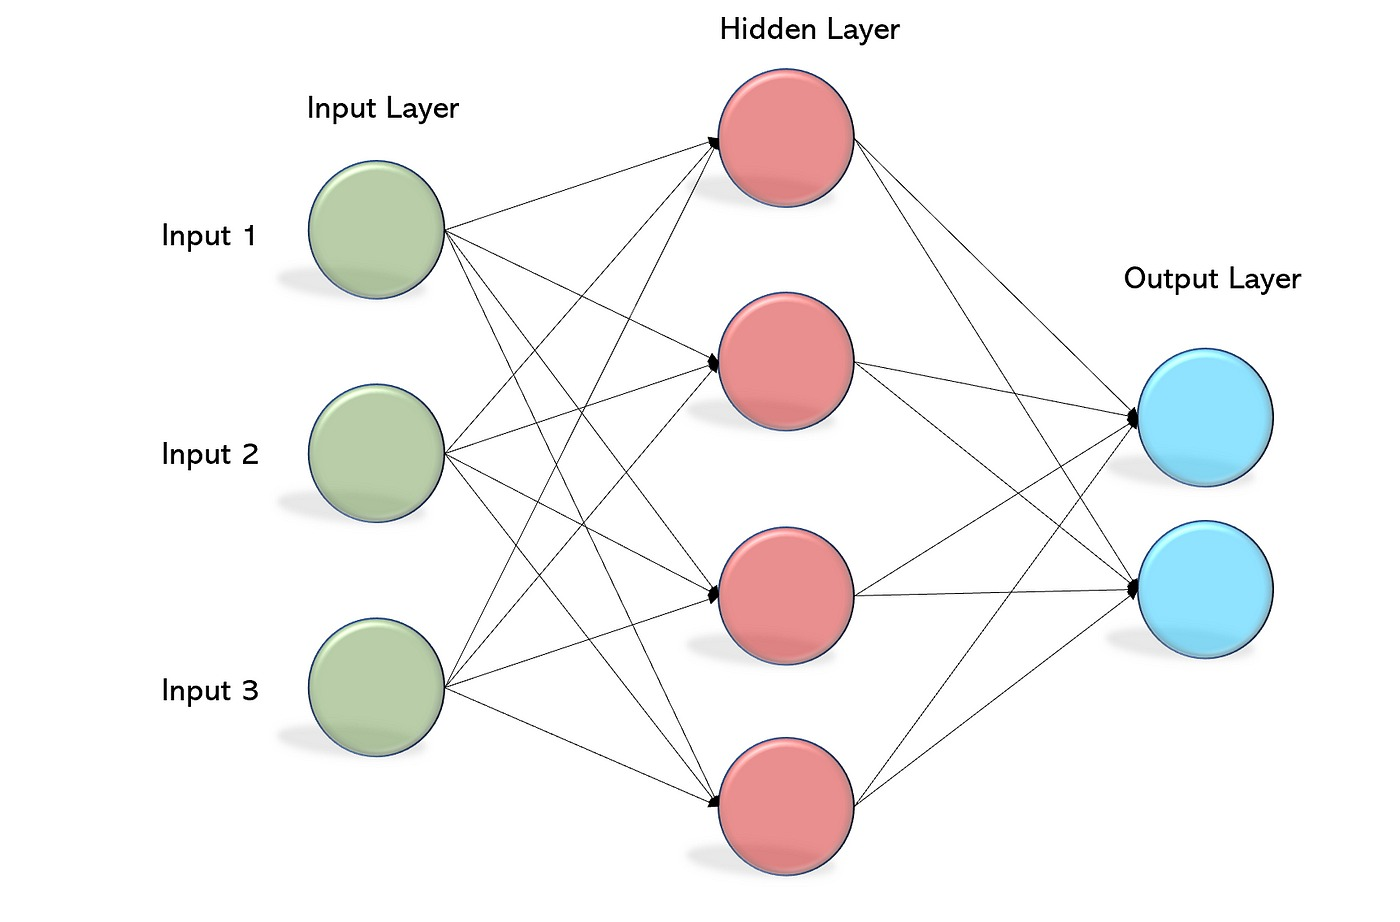

A rede MLP pode ser totalmente conectada, parcialmente conectada e localmente conectada. Aqui temos um breve resumo de cada tipo:

- **Totalmente conectada:** cada nó em uma camada é conectado a todos os outros nós da camada adjacente;
- **Parcialmente conectada:** sinapses podem ser propositalmente desconectadas com o objetivo de minimizar a especialização, maximizando a capacidade de generalização
- **Localmente conectada:** As sinapses podem ser desconectadas para que uma camada tenha foco em um sub-conjunto de todas as entradas possíveis, com o objetivo de modularizar a arquitetura do MLP e investindo na cooperação entre regiões modulares.

A especificação dos pesos sinápticos que interconectam os neurônios nas diferentes camadas requer a utilização de algoritmo de treino supervisionado, no caso, o Backpropagation Algorithm.

Para introdução do Backpropagation Algorithm, ele se baseia na heurística de aprendizagem por correção de erro, no qual é retro-propagado da camada de saída para as camadas médias.

Neste projeto estaremos utilizando de MLPs em um dataset denominado "Lower Back Pain Symptons Dataset", presente no Kaggle. Esse dataset busca identificar, a partir de características físicas obtidas na região da espinha dorsal, classificar se estamos trabalhando com uma pessoa "Normal" ou "Anormal", ou seja, sem problemas na região ou com problemas na região. Vamos abstrair os detalhes em si dos dados e o que eles possivelmente significam no ponto de vista biológico, focando completamente apenas da aplicação dos mesmos em Multilayered Perceptrons com a ideia de realizar essa classificação.

# Projeto

In [1]:
# Imports and styling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

plt.style.use('default')

## Tratando o dataset

Antes de partir para o treinamento em si das MLPs, é necessário fazer algumas alterações no dataset para que o mesmo esteja adaptado para o treino. Fazemos a leitura do dataset, que está no formato ".csv", na forma de um DataFrame da biblioteca Pandas. A partir disso, removemos linhas desse DataFrame que possua entradas nulas e, por fim, fazemos o mapeamento da coluna "Class_att" para valores binários. 

In [2]:
# Initial dataset handling
# Source data itself was initially adjusted to remove unnecessary comments and properly name columns
df = pd.read_csv('input/Dataset_spine.csv', sep=',')

# Remove, if any, empty values from the dataset
df = df.dropna()

# Map classification attribute from string to binary
df["Class_att"] = df["Class_att"].map({"Normal": 0, "Abnormal": 1})

Com o dataset nesse formato, podemos agora fazer a distribuição do mesmo. Para um treinamento adequado é necessário separar o dataset em dois splits, um split dedicado para treino e outro split para teste do modelo. Dessa forma podemos melhor observar o funcionamento do modelo em casos que ele não lidou ainda e, assim, aumentar as chances de uma análise que consiga se traduzir melhor em uma aplicação real. Utilizamos de uma ferramenta do scikit-learn, denominada "train_test_split" com esse exato objetivo, determinando "X" como os atributos a serem analisados e "y" como a classificação desejada.

In [3]:
# Separate data into training and validation
X = df.drop(["Class_att"], axis=1)
y = df["Class_att"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=69)

df_train = X_train.assign(Class_att=y_train)
df_test = X_test.assign(Class_att=y_test)

In [4]:
# Data handling for each attribute
def structure_data(str):
    """
    [0]    = train data
    [0][0] = train data with normal result
    [0][1] = train data with abnormal result
    [1]    = test data
    [1][0] = test data with normal result
    [1][1] = test data with abnormal result
    """
    return [[df_train.loc[df_train["Class_att"] == 0, str].tolist(), 
             df_train.loc[df_train["Class_att"] == 1, str].tolist()],
            [df_test.loc[df_test["Class_att"] == 0, str].tolist(), 
             df_test.loc[df_test["Class_att"] == 1, str].tolist()]]

pelvic_incidence = structure_data('pelvic_incidence')
pelvic_tilt = structure_data('pelvic_tilt')
lumbar_lordosis_angle = structure_data('lumbar_lordosis_angle')
sacral_slope = structure_data('sacral_slope')
pelvic_radius = structure_data('pelvic_radius')
degree_spondylolisthesis = structure_data('degree_spondylolisthesis')
pelvic_slope = structure_data('pelvic_slope')
direct_tilt = structure_data('direct_tilt')
thoracic_slope = structure_data('thoracic_slope')
cervical_tilt = structure_data('cervical_tilt')
sacrum_angle = structure_data('sacrum_angle')
scoliosis_slope = structure_data('scoliosis_slope')

Vamos utilizar de um gráfico de boxplot para visualizar o comportamento geral dos atributos para cada categoria.

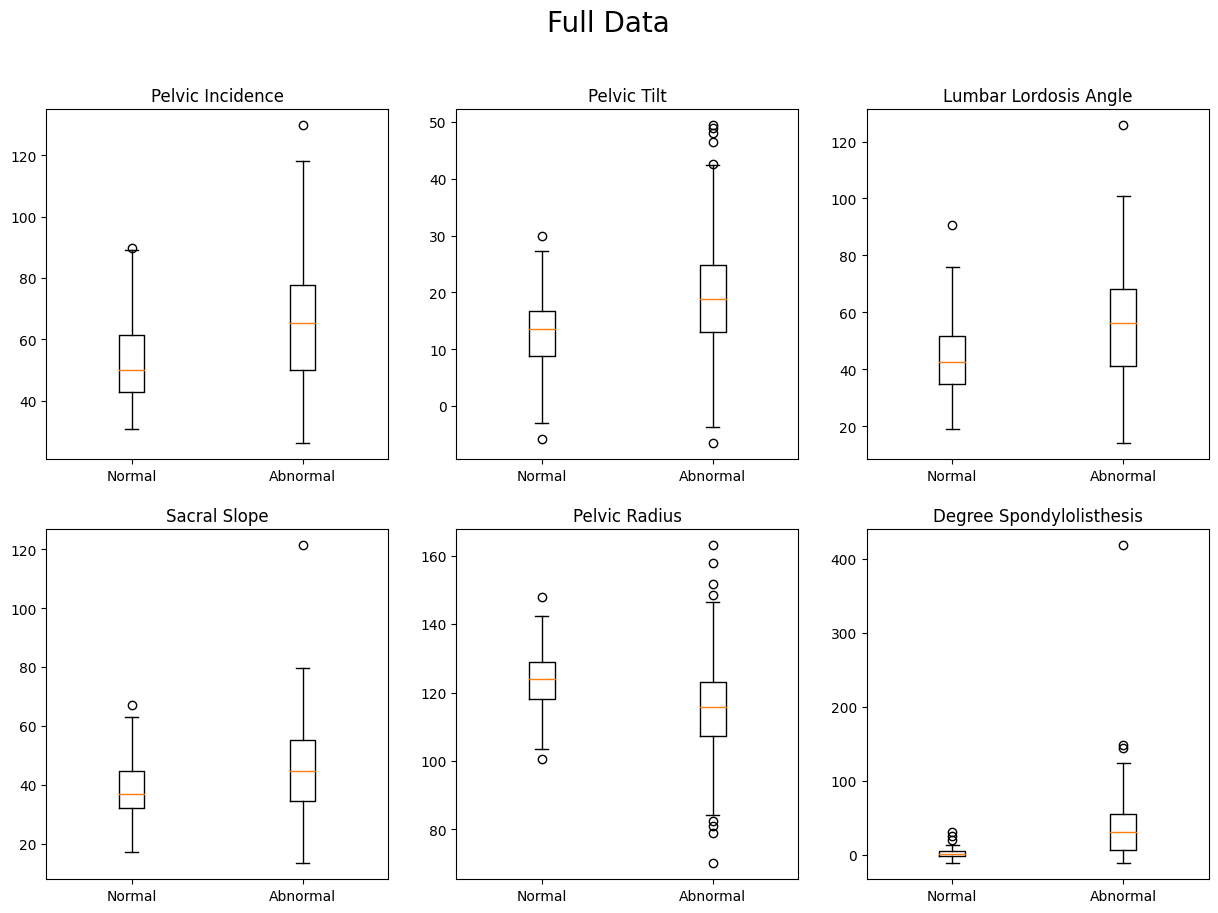

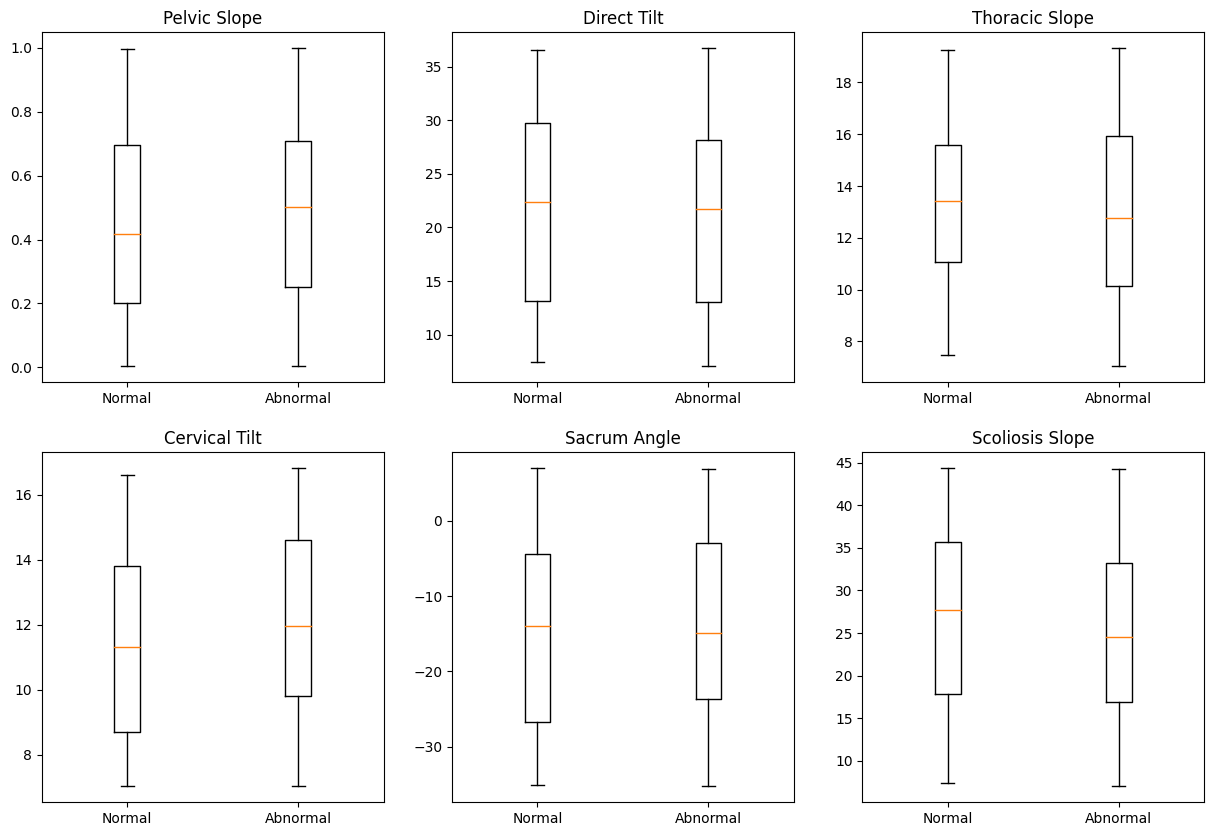

In [5]:
# Full data boxplot charting
def get_full_data(arr):
    return [arr[0][0] + arr[1][0], arr[0][1] + arr[1][1]]

figure, axis = plt.subplots(2, 3, figsize=(15, 10))
figure.suptitle("Full Data", fontsize=20)

axis[0, 0].boxplot(get_full_data(pelvic_incidence), labels=['Normal', 'Abnormal'])
axis[0, 0].set_title("Pelvic Incidence")

axis[0, 1].boxplot(get_full_data(pelvic_tilt), labels=['Normal', 'Abnormal'])
axis[0, 1].set_title("Pelvic Tilt")

axis[0, 2].boxplot(get_full_data(lumbar_lordosis_angle), labels=['Normal', 'Abnormal'])
axis[0, 2].set_title("Lumbar Lordosis Angle")

axis[1, 0].boxplot(get_full_data(sacral_slope), labels=['Normal', 'Abnormal'])
axis[1, 0].set_title("Sacral Slope")

axis[1, 1].boxplot(get_full_data(pelvic_radius), labels=['Normal', 'Abnormal'])
axis[1, 1].set_title("Pelvic Radius")

axis[1, 2].boxplot(get_full_data(degree_spondylolisthesis), labels=['Normal', 'Abnormal'])
axis[1, 2].set_title("Degree Spondylolisthesis")

plt.show()

figure, axis = plt.subplots(2, 3, figsize=(15, 10))

axis[0, 0].boxplot(get_full_data(pelvic_slope), labels=['Normal', 'Abnormal'])
axis[0, 0].set_title("Pelvic Slope")

axis[0, 1].boxplot(get_full_data(direct_tilt), labels=['Normal', 'Abnormal'])
axis[0, 1].set_title("Direct Tilt")

axis[0, 2].boxplot(get_full_data(thoracic_slope), labels=['Normal', 'Abnormal'])
axis[0, 2].set_title("Thoracic Slope")

axis[1, 0].boxplot(get_full_data(cervical_tilt), labels=['Normal', 'Abnormal'])
axis[1, 0].set_title("Cervical Tilt")

axis[1, 1].boxplot(get_full_data(sacrum_angle), labels=['Normal', 'Abnormal'])
axis[1, 1].set_title("Sacrum Angle")

axis[1, 2].boxplot(get_full_data(scoliosis_slope), labels=['Normal', 'Abnormal'])
axis[1, 2].set_title("Scoliosis Slope")

plt.show()

Alguns dos atributos continuam com comportamentos bem similares independente de se estão classificados como "Normal" ou "Anormal". No entanto, alguns casos possuem discrepâncias facilmente visualizáveis, com destaque para "Degree Spondylolisthesis" e "Pelvic Radius". Possivelmente o modelo irá usar principalmente destes aspectos para conseguir realizar sua classificação, porém não sozinhos.

Vamos agora fazer a mesma análise que fizemos no dataset inteiro para cada distribuição.

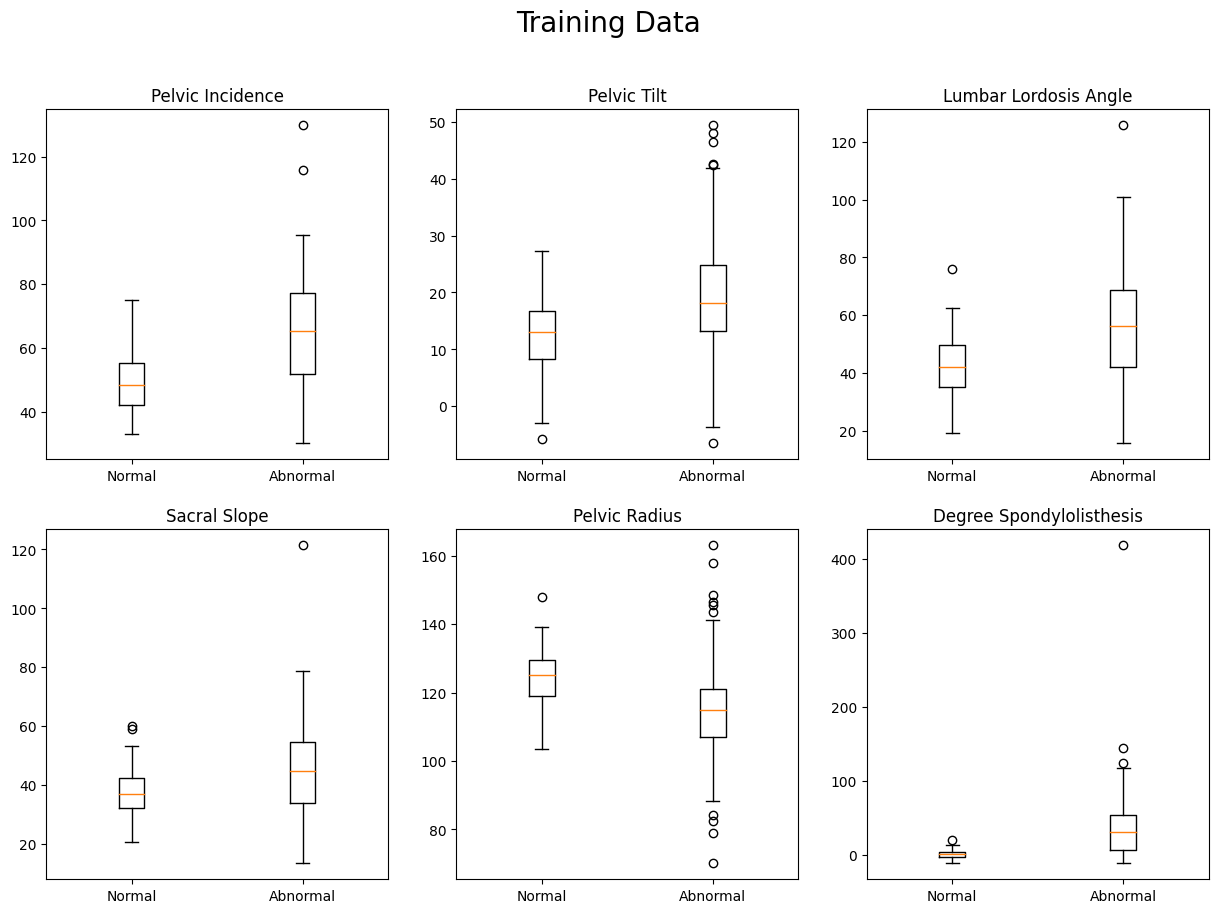

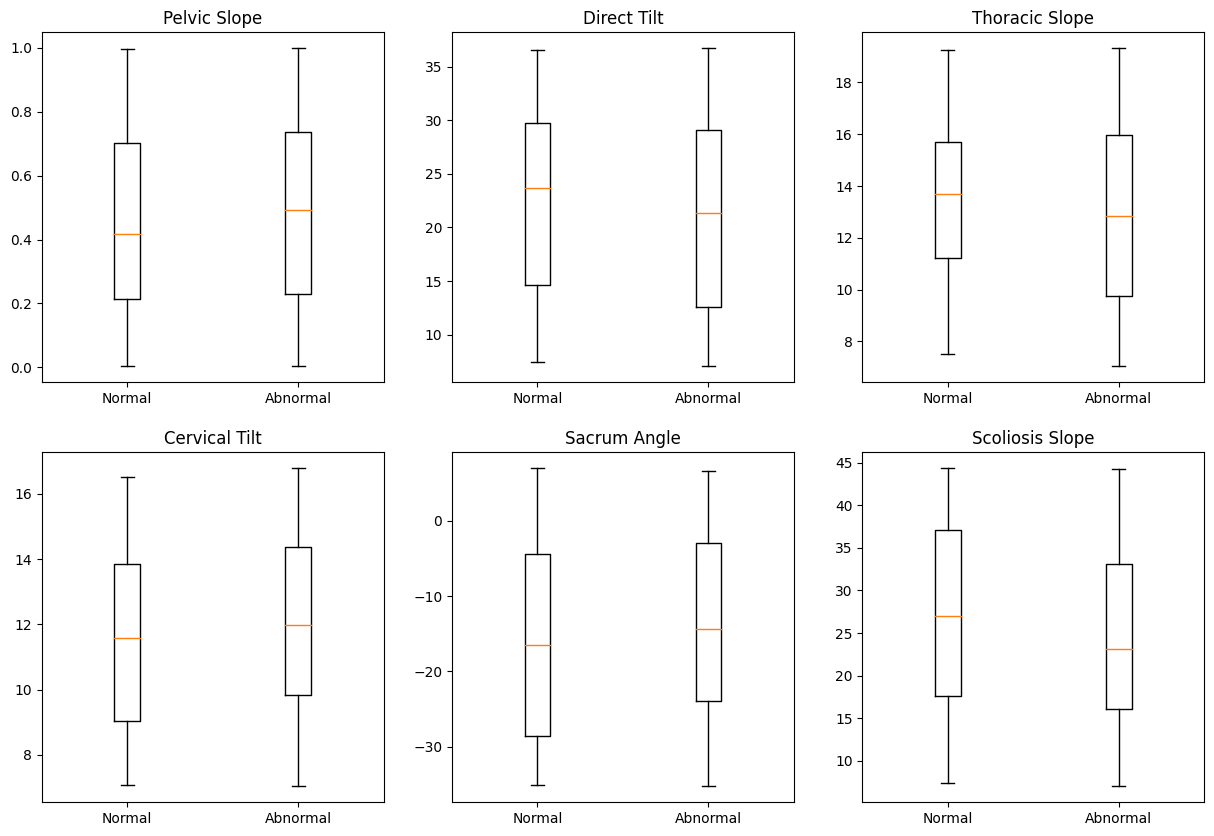

In [6]:
# Training data boxplot charting
figure, axis = plt.subplots(2, 3, figsize=(15, 10))
figure.suptitle("Training Data", fontsize=20)

axis[0, 0].boxplot(pelvic_incidence[0], labels=['Normal', 'Abnormal'])
axis[0, 0].set_title("Pelvic Incidence")

axis[0, 1].boxplot(pelvic_tilt[0], labels=['Normal', 'Abnormal'])
axis[0, 1].set_title("Pelvic Tilt")

axis[0, 2].boxplot(lumbar_lordosis_angle[0], labels=['Normal', 'Abnormal'])
axis[0, 2].set_title("Lumbar Lordosis Angle")

axis[1, 0].boxplot(sacral_slope[0], labels=['Normal', 'Abnormal'])
axis[1, 0].set_title("Sacral Slope")

axis[1, 1].boxplot(pelvic_radius[0], labels=['Normal', 'Abnormal'])
axis[1, 1].set_title("Pelvic Radius")

axis[1, 2].boxplot(degree_spondylolisthesis[0], labels=['Normal', 'Abnormal'])
axis[1, 2].set_title("Degree Spondylolisthesis")

plt.show()

figure, axis = plt.subplots(2, 3, figsize=(15, 10))

axis[0, 0].boxplot(pelvic_slope[0], labels=['Normal', 'Abnormal'])
axis[0, 0].set_title("Pelvic Slope")

axis[0, 1].boxplot(direct_tilt[0], labels=['Normal', 'Abnormal'])
axis[0, 1].set_title("Direct Tilt")

axis[0, 2].boxplot(thoracic_slope[0], labels=['Normal', 'Abnormal'])
axis[0, 2].set_title("Thoracic Slope")

axis[1, 0].boxplot(cervical_tilt[0], labels=['Normal', 'Abnormal'])
axis[1, 0].set_title("Cervical Tilt")

axis[1, 1].boxplot(sacrum_angle[0], labels=['Normal', 'Abnormal'])
axis[1, 1].set_title("Sacrum Angle")

axis[1, 2].boxplot(scoliosis_slope[0], labels=['Normal', 'Abnormal'])
axis[1, 2].set_title("Scoliosis Slope")

plt.show()

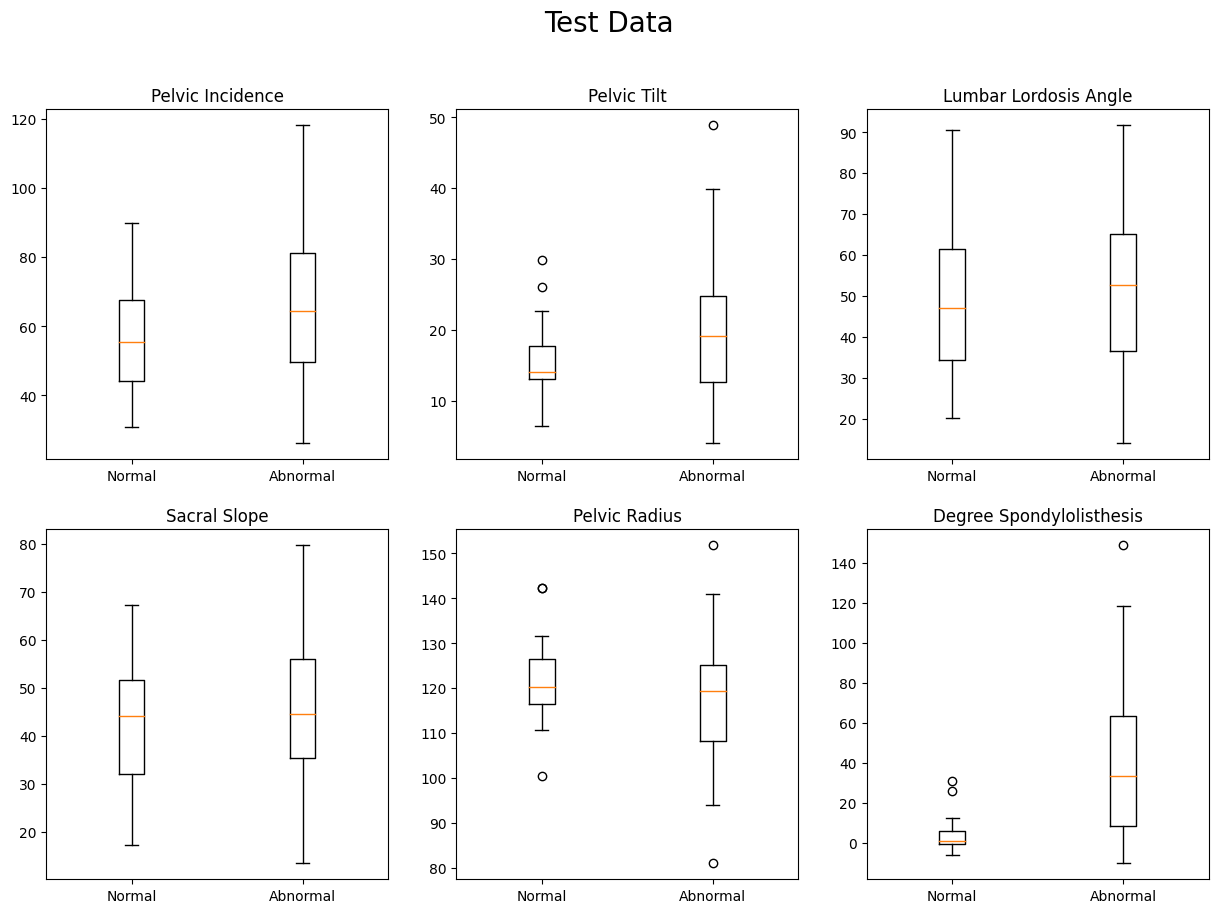

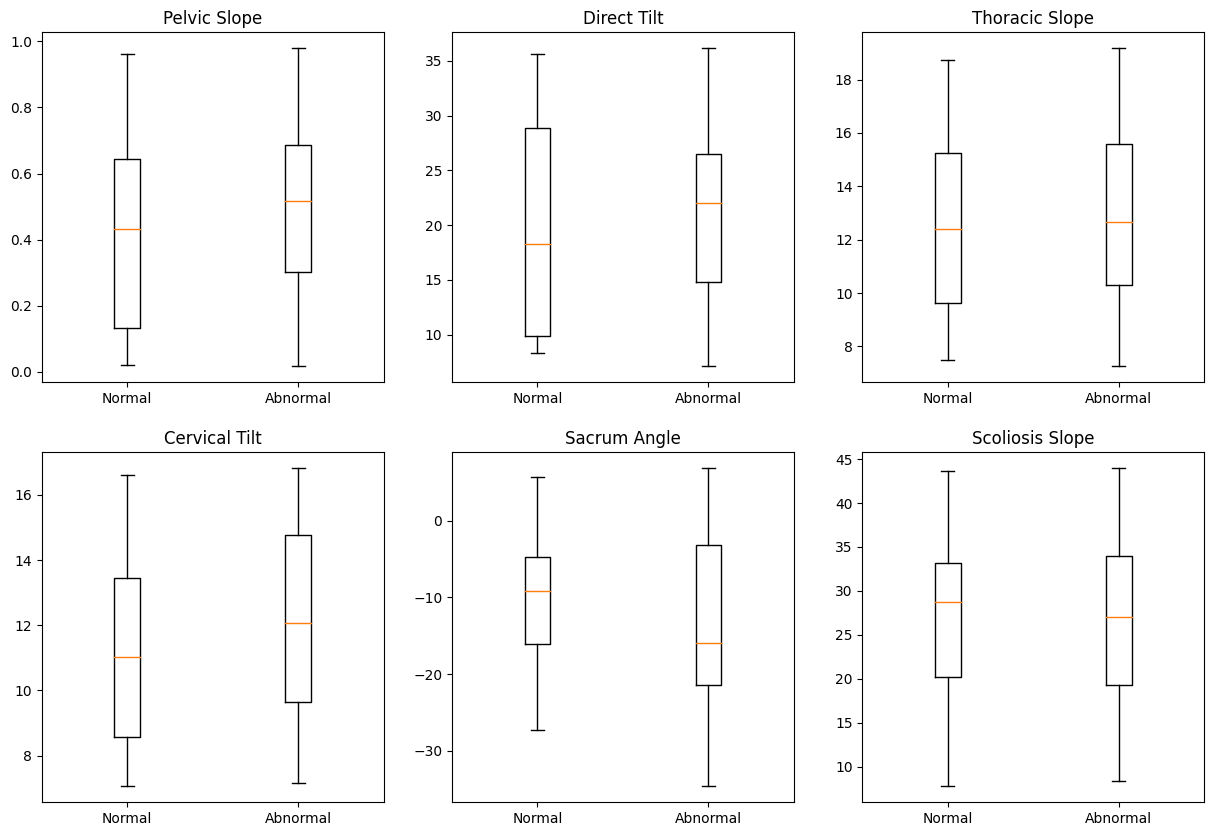

In [7]:
# Test data boxplot charting
figure, axis = plt.subplots(2, 3, figsize=(15, 10))
figure.suptitle("Test Data", fontsize=20)

axis[0, 0].boxplot(pelvic_incidence[1], labels=['Normal', 'Abnormal'])
axis[0, 0].set_title("Pelvic Incidence")

axis[0, 1].boxplot(pelvic_tilt[1], labels=['Normal', 'Abnormal'])
axis[0, 1].set_title("Pelvic Tilt")

axis[0, 2].boxplot(lumbar_lordosis_angle[1], labels=['Normal', 'Abnormal'])
axis[0, 2].set_title("Lumbar Lordosis Angle")

axis[1, 0].boxplot(sacral_slope[1], labels=['Normal', 'Abnormal'])
axis[1, 0].set_title("Sacral Slope")

axis[1, 1].boxplot(pelvic_radius[1], labels=['Normal', 'Abnormal'])
axis[1, 1].set_title("Pelvic Radius")

axis[1, 2].boxplot(degree_spondylolisthesis[1], labels=['Normal', 'Abnormal'])
axis[1, 2].set_title("Degree Spondylolisthesis")

plt.show()

figure, axis = plt.subplots(2, 3, figsize=(15, 10))

axis[0, 0].boxplot(pelvic_slope[1], labels=['Normal', 'Abnormal'])
axis[0, 0].set_title("Pelvic Slope")

axis[0, 1].boxplot(direct_tilt[1], labels=['Normal', 'Abnormal'])
axis[0, 1].set_title("Direct Tilt")

axis[0, 2].boxplot(thoracic_slope[1], labels=['Normal', 'Abnormal'])
axis[0, 2].set_title("Thoracic Slope")

axis[1, 0].boxplot(cervical_tilt[1], labels=['Normal', 'Abnormal'])
axis[1, 0].set_title("Cervical Tilt")

axis[1, 1].boxplot(sacrum_angle[1], labels=['Normal', 'Abnormal'])
axis[1, 1].set_title("Sacrum Angle")

axis[1, 2].boxplot(scoliosis_slope[1], labels=['Normal', 'Abnormal'])
axis[1, 2].set_title("Scoliosis Slope")

plt.show()

Podemos observar que as características gerais dos atributos foram mantidas para as distribuições originadas. Ao mesmo tempo, não se tratam de todas características iguais de forma que seja possível realmente ocorrer um teste do modelo em situações que não se limitam ao que foi encontrado durante seu treinamento. 

## Treinamento de MLPs

Uma vez com o dataset separado em distribuições para treinamento e para teste, podemos agora iniciar o processo de treinamento de alguns MLPs com o objetivo de estudar o desempenho dos mesmos na tarefa proposta pelo dataset. Ao todos realizaremos o treinamento de seis modelos, cada um com mudança de alguns parâmetros em relação aos outros. Definimos uma função logo abaixo com o objetivo de realizar o treinamento a partir de certos parâmetros que passamos pela mesma e, também, devolver uma matriz de confusão e valores de performance para análise.

Antes de realizar a análise dos MLPs, vamos tratar das características comuns a cada um deles:


*   Função de ativação → Será utilizada a função logística, visto ser melhor adequada para tratar situações com números flutuantes, como presentes nos dados do dataset.
*   Iterações máximas → O valor estabelecido foi de 10000 iterações, ou seja, a partir da 10000º iteração, não haverá mais treinamento.
*   Tolerância → Próprio da própria implementação, será o valor estabelecido de tolerância na melhora de desempenho do modelo, ou seja, o quanto a mais o modelo tem que melhorar o seu desempenho nas últimas 10 épocas para que o treinamento continue. Por padrão, a biblioteca adota $10^{-4}$. Esse valor é mantido ao longo dos treinamentos.

Vamos agora analisar cada caso.


In [8]:
#MLPs training and scoring
def mlp_processing(layers, lrn_rate, slvr):
    # Training
    mlp = MLPClassifier(hidden_layer_sizes=layers, activation='logistic', learning_rate=lrn_rate, solver=slvr, max_iter=10000, tol=1e-4)
    mlp.fit(X_train, y_train)

    # Scoring
    training_scores.append(mlp.score(X_train, y_train))
    test_scores.append(mlp.score(X_test, y_test))
    print("Training set score: {:.4f}".format(mlp.score(X_train, y_train)))
    print("Test set score: {:.4f}".format(mlp.score(X_test, y_test)))

    # Label update
    scores_label.append('MLP {}'.format(len(scores_label) + 1))

    # Confusion matrix
    y_pred = mlp.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot()
    plt.show()

# Reset scores and graph labels before (re)doing training
training_scores = list()
test_scores = list()
scores_label = list()

Training set score: 0.8836
Test set score: 0.7821


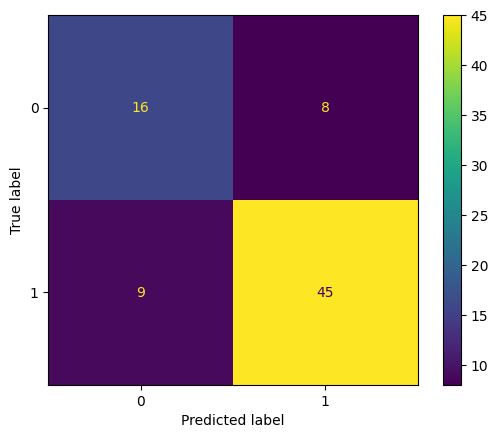

In [9]:
mlp_processing((10), 'constant', 'adam')

O primeiro MLP treinado possui uma única camada na sua "Hidden layer", com um total de 10 perceptrons na mesma, sendo então um MLP relativamente pequeno. O padrão utilizado para as modificações do peso (learning_rate) será adotado como "constant", ou seja, é mantido constante. Além disso, o algoritmo de otimização dos pesos utilizado é o "adam". Discutir os detalhes desse algoritmo consiste em fugir do propósito deste projeto, logo, o mesmo não será feito. 

A sua performance, apesar para um modelo simples, é satisfatória. O modelo chega a alcançar $88\%$ de acertos na distribuição de treino do dataset, e consegue um valor aproximado de $78\%$ na distribuição de teste. Apesar dos bons valores, é possível observar um problema a partir da matriz de confusão. Devido ao dataset com quantidade consideravelmente maior de casos do dataset é classificado como "anormal", o modelo mostra problemas em classificar casos classificados como "normal", possuindo uma precisão de $66,7\%$ apenas nesses casos na distribuição de teste.

Training set score: 0.9440
Test set score: 0.7949


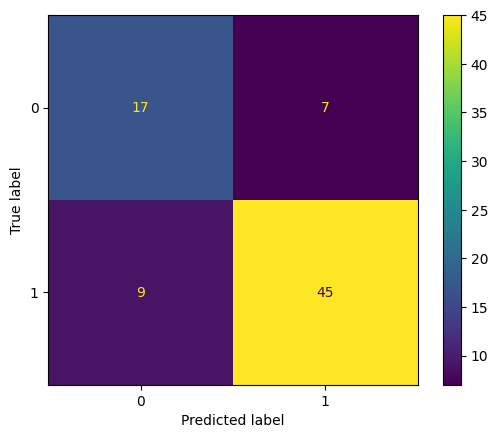

In [10]:
mlp_processing((10, 10, 10), 'constant', 'adam')

O segundo MLP treinado possui diferença apenas na sua "Hidden layer". Ao invés de uma única camada com 10 perceptrons, agora temos três camadas com essa mesma quantidade de perceptrons cada, sendo um modelo um pouco mais complexo.

Ao observar os resultados do treinamento, vemos que a taxa de acerto do MLP na distribuição de treino sobe, alcançando cerca de $94\%$. Isso não necessariamente é algo positivo, visto que podemos estar lidando com um cenário de overfitting. No entanto, observamos que houve um ganho na taxa de acerto também na distribução para teste, alcançando cerca de $79\%$. No entanto, vemos que o problema de acertos nos casos classificados como "normal" segue.

Training set score: 1.0000
Test set score: 0.7564


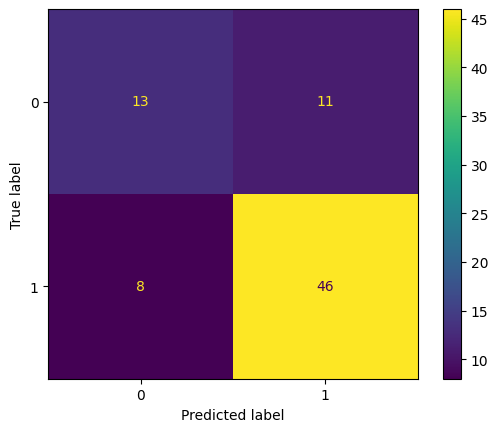

In [11]:
mlp_processing((100, 100, 100), 'constant', 'adam')

Para o terceiro MLP, aumentamos a quantidade de perceptrons em cada uma das três camadas, de 10 para 100 perceptrons, gerando ao todo mil vezes mais perceptrons que o modelo anterior. 

O resultado do treinamento mostra um valor perfeito de acerto na distribuição de treinamento, com uma piora na acurácia na distribuição de teste, cerca de $75\%$. É possível afirmar que já estamos lidando com um cenário de overfitting, visto a acurácia presente já no teste de treino. É possível perceber que o desempenho nos casos classificados como "normal" pioram ainda mais, alcançando cerca de $54\%$ de precisão apenas.

Training set score: 1.0000
Test set score: 0.7692


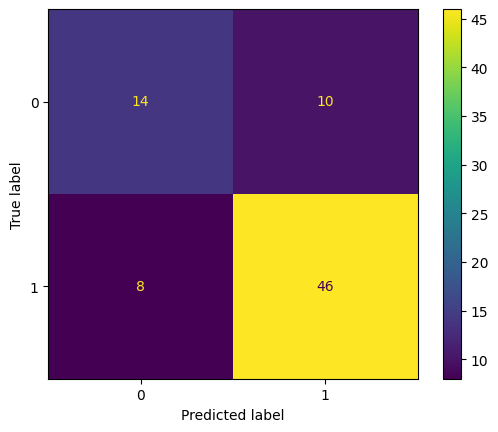

In [12]:
mlp_processing((100, 100, 100), 'constant', 'lbfgs')

Mantendo a quantidade de perceptrons e a forma que os mesmos estão distribuídos, vamos agora alterar a função de otimização para uma mais sofisticada, que é a "Limited-memory BFGS".

É possível observer mais um caso claro de overfitting, com um aproveitamento de $100\%$ na distribuição de treino, porém no entanto com uma redução de acurácia na distribuição de teste similar ao anterior, com cerca de $77\%$, ainda inferior aos casos iniciais. A acurácia mantém seu problema no aspecto dos casos "Normal", com cerca de $58\%$.

Training set score: 0.8750
Test set score: 0.7564


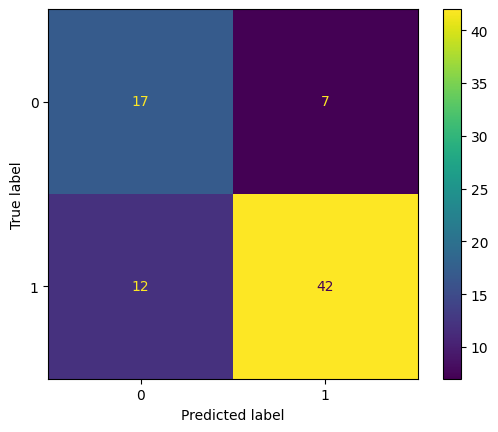

In [13]:
mlp_processing((10), 'adaptive', 'sgd')

Training set score: 0.6724
Test set score: 0.6923


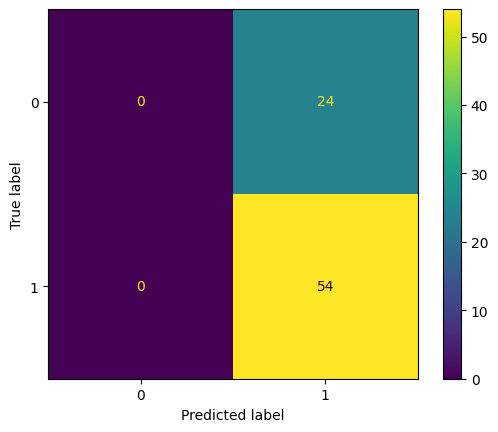

In [14]:
mlp_processing((10, 10), 'adaptive', 'sgd')

Por fim, tentamos atualizar o funcionamento da taxa de aprendizado. Seguindo a documentação, tal mudança só possui efeito ao modificar, também, o algoritmo de otimização para o "Stochastic Gradient Descent". 

O desempenho do SGD foi semelhante ao dos testes iniciais, mas somente quando utilizamos apenas uma camada oculta. 

O desempenho obtido ao adicionar mais de uma camada foi igual para cada mudança no funcionamento da taxa de aprendizado, gerando todas as previsões para o grupo "anormal". Tal comportamento é obviamente inadequado, e por isso decidimos não dar continuidade aos seus testes.

## Comparando desempenhos

Para melhor visualizar a comparação entre as acurácias, podemos usar de um gráfico, que segue:

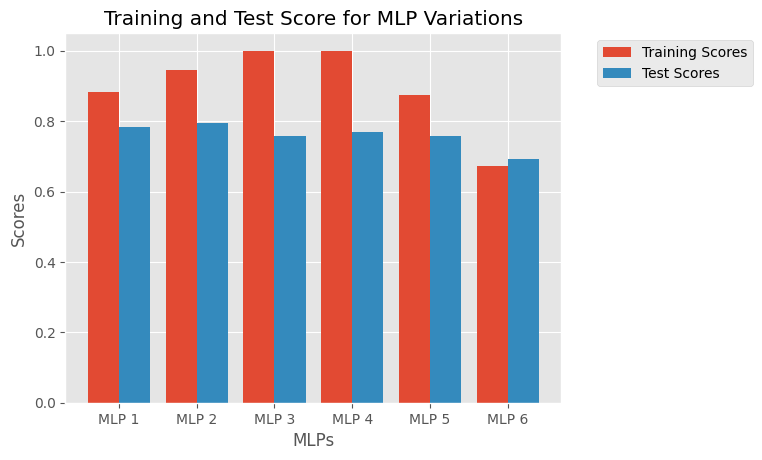

In [15]:
# Score results bar plot for all MLPs
plt.style.use('ggplot')

X_axis = np.arange(len(scores_label))

plt.bar(X_axis - 0.2, training_scores, 0.4, label="Training Scores")
plt.bar(X_axis + 0.2, test_scores, 0.4, label="Test Scores")

plt.xticks(X_axis, scores_label)
plt.xlabel("MLPs")
plt.ylabel("Scores")
plt.title("Training and Test Score for MLP Variations")
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
plt.show()

Desde o MLP1 até o MLP5, é possível observar a tendência de overfitting que foi observada anteriormente. Vemos que a barra vermelha, representando a acurácia na distribuição de treino, constantemente sobe sem replicar o mesmo na barra azul, distribuição de teste. Isso mostra o modelo se adequando aos parâmetros para realizar a tarefa na distribuição de treino, no entanto, apenas nela. 

Por outro lado, temos o MLP6, que é apenas uma aberração quando comparado com o comportamento dos outros, possuindo uma precisão baixa, e um desempenho na distribuição de teste até superior ao desempenho na distribuição de treino, o que é incomum. A provável causa desse comportamento é a alta propagação de erro por conta de várias estimativas de gradiente descendente, e a partir dele fica claro que não se trata de uma configuração válida para usar MLPs para a tarefa em questão.

# Conclusão

Para o dataset em questão, ficou claro que, por conta do seu tamanho diminuto, aumentar a quantidade de camadas ocultas no MLP para além de 1 não tende a surtir efeito positivo nos resultados, principalmente ao considerar a checagem frente ao dados de teste. Esse fato é reforçado pela pouca quantidade de parâmetros do dataset e de parâmetros que demonstra mdiferentes distribuições entre os casos normais e anormais.
